LDA and QDA are both techniques used to classify things (like sorting apples and oranges).

**LDA (Linear Discriminant Analysis):**

- Works best when the groups can be separated with a straight line.
- It also helps simplify data by reducing the number of features while keeping class differences clear.

**QDA (Quadratic Discriminant Analysis):**

- Works best when the groups need a curved boundary for proper separation.
- More flexible than LDA, but requires more data to avoid overfitting.

**Key Difference:**

- LDA assumes a simple, straight separation between classes.
- QDA allows for more complex, curved separations between classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Linear Discriminat Analysis (LDA)

In [2]:
# Generate synthetic dataset
X, y = make_classification(n_samples=200, n_features=5, n_classes=2, n_informative=2, random_state=42)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # Reduce to 1D
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
#X_test_lda

In [3]:
# Train a simple classifier (e.g., logistic regression)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.2f}")

Classification Accuracy: 0.90


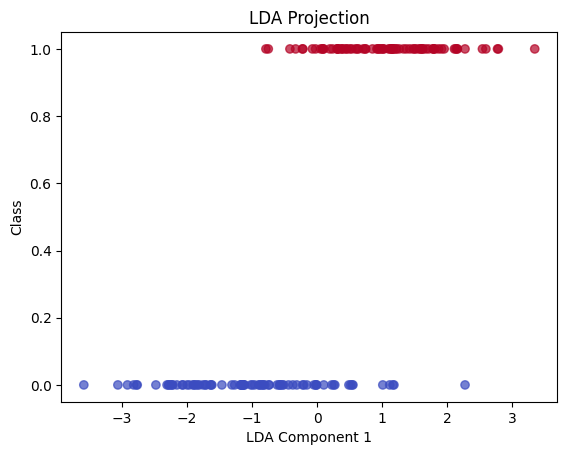

In [4]:
# Plot data in transformed space
plt.scatter(X_train_lda, y_train, c=y_train, cmap='coolwarm', alpha=0.7)
plt.xlabel("LDA Component 1")
plt.ylabel("Class")
plt.title("LDA Projection")
plt.show()

# Quadratic Discriminant Analysis (QDA)

In [5]:
# Generate synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, 
                           n_redundant=0, n_clusters_per_class=1, class_sep=1.5, random_state=42)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Apply QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predict and evaluate
y_pred = qda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"QDA Classification Accuracy: {accuracy:.2f}")

QDA Classification Accuracy: 0.90


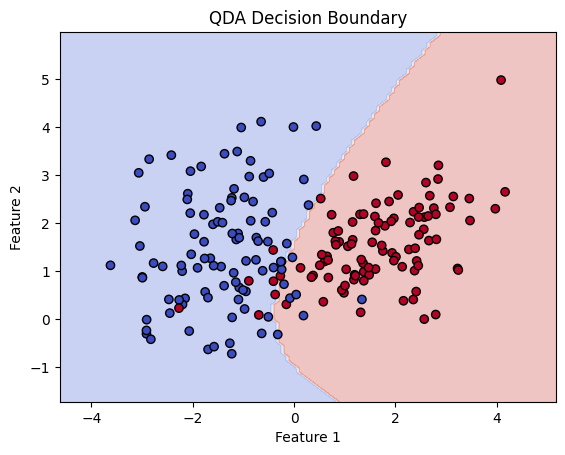

In [7]:
# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("QDA Decision Boundary")
plt.show()